#Boston Housing Rate Dataset

In [147]:
import pandas as pd
import numpy as np

##Importing Boston Dataset from Source. As it is removed from scikit .

In [148]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


Attribute that best follow the linear relationship with the output price.

In [149]:
df = pd.DataFrame(data=data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['PRICE'] = target

correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix['PRICE'])

best_attribute = correlation_matrix['PRICE'].idxmin(axis=0)
print(f"The attribute with the highest correlation with PRICE is: {best_attribute}")

X = df[[best_attribute]].values
y = df['PRICE'].values

Correlation Matrix:
 CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64
The attribute with the highest correlation with PRICE is: LSTAT


##Splitting the Dataset into train and test set

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((303, 1), (203, 1), (303,), (203,))

##Standardizing the features

In [151]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Analytical Formula(Normal Equation)

In [152]:
#Normal Equation.
x_train = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
x_test = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]
theta = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)

y_alt = theta[0] + theta[1] * X_train_scaled
print("The Regression Coefficients are :(Analytical Formula)")
print("Slope β0 = ",theta[0])
print("Intercepts = ",theta[1])


The Regression Coefficients are :(Analytical Formula)
Slope β0 =  22.11254125412541
Intercepts =  -6.7800701041946265


In [153]:
y_pred = x_test.dot(theta)


In [154]:
#Calculating SSE & R2
sse = np.sum((y_test - y_pred) ** 2)
print("SSE : ",sse)
sst = np.sum((y_test - np.mean(y_test)) ** 2)

r2 = 1 - (sse / sst)
print("R_Square : ",r2)


SSE :  9182.071767843832
R_Square :  0.4991639141534876


#Full-Batch Gradient descent

In [155]:
#initializing parameters
theta0 = 0
theta1 = np.zeros(X_train_scaled.shape[1])
alpha = 0.01 #learning rate
n = 1000

for i in range(n):
    y_pred_gd = theta0 + np.dot(X_train_scaled,theta1)
    error = y_pred_gd - y_train

    theta0 -= alpha * (1/len(y_train)) * np.sum(error)
    theta1 -= alpha * (1/len(y_train)) * np.dot(X_train_scaled.T,error)

print("The Regression Coefficients are :(Gradient Descent)")
print("Slope β0 = ",theta0)
print("Intercepts = ",theta1)

The Regression Coefficients are :(Gradient Descent)
Slope β0 =  22.111586628136056
Intercepts =  [-6.7797774]


##SSR & R2

In [156]:
y_pred_gd = theta0 + np.dot(X_test_scaled,theta1)
SSE_gd = np.sum((y_test - y_pred_gd) ** 2)
print("SSE : ",SSE_gd)

sst = np.sum((y_test - np.mean(y_test)) ** 2)

r2_gd = 1 - (SSE_gd / sst)
print("R_Square : ",r2_gd)

SSE :  9182.130894724543
R_Square :  0.4991606890778999


#Stochastic Gradient Descent

In [157]:
from sklearn.linear_model import SGDRegressor
# Create the SGDRegressor object
model = SGDRegressor(max_iter=1000, tol=1e-3,learning_rate='constant', eta0=0.01)
model.fit(X_train_scaled, y_train)

y_pred_sd = model.predict(X_test_scaled)
print("The Regression Coefficients are :(Stochastic)")
print("Slope β0 = ",model.intercept_)
print("Intercept β1 = ",model.coef_)


The Regression Coefficients are :(Stochastic)
Slope β0 =  [22.08676893]
Intercept β1 =  [-7.09717896]


In [158]:
#Calculating R2 & SSE
res = y_test - y_pred_sd
sse = np.sum(res**2)
r2 = 1 - (sse / np.sum((y - np.mean(y))**2))
print("Sum Squared Error (SSE) = ",sse)
print("R Square (R2) = ",r2)

Sum Squared Error (SSE) =  9122.89373352286
R Square (R2) =  0.7864305964530085


In [159]:
print(y_pred_gd.shape)
print(y_pred_sd.shape)

(203,)
(203,)


#Comparing Results :

(303, 1)
(303,)


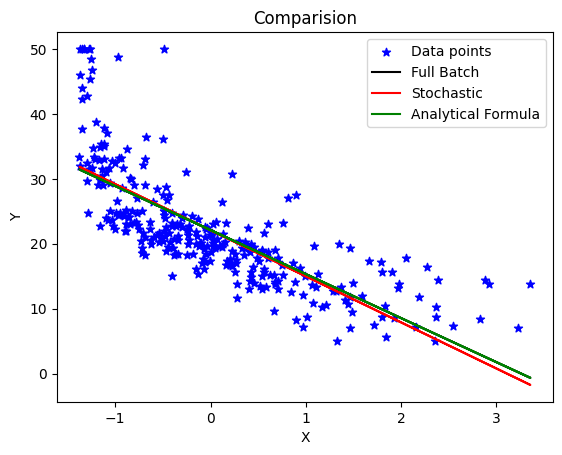

In [160]:
import matplotlib.pyplot as plt

print(X_train_scaled.shape)
print(y_train.shape)

plt.scatter(X_train_scaled, y_train, color='blue', label='Data points',marker='*')
X_plot = X_train_scaled

plt.plot(X_plot,theta0 + theta1 * X_plot, label='Full Batch', color='black')
plt.plot(X_plot, model.intercept_ + model.coef_ * X_plot, label='Stochastic', color='red')
plt.plot(X_plot,y_alt, label='Analytical Formula', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparision')
plt.legend()
plt.show()
